# What's the weather like as we approach the equator?

Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator.

NOTE: This project takes into account the weather inforomation from one day. Each time the code is run it randomizes 500 cities and pulls the current weather data so the results of this code will vary each time it is run.

In [1]:
# ependencies
import openweathermapy.core as owm
import json
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import requests
from citipy import citipy
from datetime import datetime as dt

# Get API key
from owm_config import api_key

# Set plot style
plt.style.use("seaborn")

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

# Get 500 random cities and random distances from the equator

In [2]:
# Getting lat/lng values for finding cities

# Set Lat & Lng Zones to randomly pick geo coordinates
lat_zone = np.arange(-90,90,15)
lng_zone = np.arange(-180,180,15)


# Creating df for geo coordinates
locations_df = pd.DataFrame()

locations_df["Lat"] = ""
locations_df["Lng"] = ""

# From each zone, randomly pick 50 unique coordinates and adding to the dataframe.
for x in lat_zone:
    for y in lng_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        latitude = random.sample(x_values,50)
        longitude = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in latitude]
        lng_samples = [y+dec_lng for dec_lng in longitude]
        locations_df = locations_df.append(pd.DataFrame.from_dict({"Lat":lat_samples,
                                       "Lng":lng_samples}))
locations_df = locations_df.reset_index(drop=True)
locations_df.shape

(14400, 2)

In [3]:
# Using citipy to get nearest city to location coordinates

locations_df["Closest City"] = ""
locations_df["Country Code"] = ""
for index,row in locations_df.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Lng"])
    locations_df.set_value(index,"Closest City",city.city_name)
    locations_df.set_value(index,"Country Code",city.country_code)
locations_df.head()


,Lat,Lng,Closest City,Country Code
0,-179.21,-357.73,vaini,to
1,-173.84,-359.58,vaini,to
2,-178.75,-346.87,vaini,to
3,-178.34,-351.64,vaini,to
4,-165.04,-357.85,vaini,to


In [4]:
# Deleting random coordinates that do not match city coordinates

cities_df = locations_df.drop(['Lat', 'Lng'],axis=1)

# Dropping and duplicate cities
cities_df = cities_df.drop_duplicates()

cities_df.shape

(878, 2)

# Don't forget to change sample size to 500 when done

In [5]:
# Getting 500 random cities for the remaining list
random_cities = cities_df.sample(500)
random_cities = random_cities.reset_index(drop=True)
random_cities.head()

,Closest City,Country Code
0,qibili,tn
1,alakurtti,ru
2,salym,ru
3,sinjah,sd
4,kagoro,ng


# Get weather data for the 500 random cities selected above

In [6]:
# Get current weather to see the JSON format
settings = {"units": "metric", "appid": api_key}
current_weather_clt = owm.get_current("Charlotte", **settings)
print(f"{json.dumps(current_weather_clt, indent=4)}")

{
    "coord": {
        "lon": -80.84,
        "lat": 35.23
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 3.33,
        "pressure": 1034,
        "humidity": 74,
        "temp_min": 2,
        "temp_max": 4
    },
    "visibility": 16093,
    "wind": {
        "speed": 2.1,
        "deg": 50
    },
    "clouds": {
        "all": 40
    },
    "dt": 1522067700,
    "sys": {
        "type": 1,
        "id": 1797,
        "message": 0.0039,
        "country": "US",
        "sunrise": 1522063063,
        "sunset": 1522107625
    },
    "id": 4460243,
    "name": "Charlotte",
    "cod": 200
}


In [7]:
# Setting up values for OpenWeatherMap API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"

params = { "appid" :api_key,"units":"metric" }

In [8]:
# Loop through to get Lat, Lng, Temp, Wind Speed, Humidity, and Cloudienss for each random city
# and append to random_cities

# I figured out how to hide my key
def encrypt_key(input_url):
    return input_url[0:53]+"<NoSeeMyKey>"+input_url[85:]

for index,row in random_cities.iterrows():
    params["q"] =f'{row["Closest City"]},{row["Country Code"]}'
    print(f"Processing Record {index+1} for: {params['q']}")
    city_weather = requests.get(base_url,params)
    print(encrypt_key(city_weather.url))
    city_weather  = city_weather.json()
    random_cities.set_value(index,"Latitude",city_weather.get("coord",{}).get("lat"))
    random_cities.set_value(index,"Longitude",city_weather.get("coord",{}).get("lon"))
    random_cities.set_value(index,"Temperature",city_weather.get("main",{}).get("temp_max"))
    random_cities.set_value(index,"Wind Speed",city_weather.get("wind",{}).get("speed"))
    random_cities.set_value(index,"Humidity",city_weather.get("main",{}).get("humidity"))
    random_cities.set_value(index,"Cloudiness",city_weather.get("clouds",{}).get("all"))

Processing Record 1 for: qibili,tn
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=qibili%2Ctn
Processing Record 2 for: alakurtti,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=alakurtti%2Cru
Processing Record 3 for: salym,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=salym%2Cru
Processing Record 4 for: sinjah,sd
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sinjah%2Csd
Processing Record 5 for: kagoro,ng
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kagoro%2Cng
Processing Record 6 for: onega,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=onega%2Cru
Processing Record 7 for: kumluca,tr
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kumluca%2Ctr
Processing Record 8 for: mersing,my
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=mizdah%2Cly
Processing Record 64 for: chagda,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=chagda%2Cru
Processing Record 65 for: kommunisticheskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kommunisticheskiy%2Cru
Processing Record 66 for: hirado,jp
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=hirado%2Cjp
Processing Record 67 for: tokat,tr
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=tokat%2Ctr
Processing Record 68 for: gazni,af
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=gazni%2Caf
Processing Record 69 for: palmer,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=palmer%2Cus
Processing Record 70 for: lipin bor,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metr

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=dedza%2Cmw
Processing Record 125 for: vila do maio,cv
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=vila+do+maio%2Ccv
Processing Record 126 for: warri,ng
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=warri%2Cng
Processing Record 127 for: hovd,mn
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=hovd%2Cmn
Processing Record 128 for: sistranda,no
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sistranda%2Cno
Processing Record 129 for: plymouth,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=plymouth%2Cus
Processing Record 130 for: banda aceh,id
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=banda+aceh%2Cid
Processing Record 131 for: ikornnes,no
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=asaba%2Cng
Processing Record 187 for: kuandian,cn
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kuandian%2Ccn
Processing Record 188 for: yar-sale,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=yar-sale%2Cru
Processing Record 189 for: rosita,ni
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=rosita%2Cni
Processing Record 190 for: honavar,in
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=honavar%2Cin
Processing Record 191 for: cananeia,br
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=cananeia%2Cbr
Processing Record 192 for: amga,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=amga%2Cru
Processing Record 193 for: keffi,ng
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=k

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=chapada+dos+guimaraes%2Cbr
Processing Record 248 for: airai,pw
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=airai%2Cpw
Processing Record 249 for: olbia,it
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=olbia%2Cit
Processing Record 250 for: utica,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=utica%2Cus
Processing Record 251 for: chieti,it
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=chieti%2Cit
Processing Record 252 for: sarakhs,ir
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sarakhs%2Cir
Processing Record 253 for: louisbourg,ca
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=louisbourg%2Cca
Processing Record 254 for: luganville,vu
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&u

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=pilar%2Cpy
Processing Record 310 for: port lincoln,au
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=port+lincoln%2Cau
Processing Record 311 for: resistencia,ar
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=resistencia%2Car
Processing Record 312 for: beira,mz
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=beira%2Cmz
Processing Record 313 for: wendo,et
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=wendo%2Cet
Processing Record 314 for: kingston,ca
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kingston%2Cca
Processing Record 315 for: khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=khatanga%2Cru
Processing Record 316 for: fairbanks,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyK

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=yellowknife%2Cca
Processing Record 371 for: danville,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=danville%2Cus
Processing Record 372 for: cassilandia,br
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=cassilandia%2Cbr
Processing Record 373 for: sibolga,id
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sibolga%2Cid
Processing Record 374 for: sheffield,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sheffield%2Cus
Processing Record 375 for: lagoa formosa,br
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=lagoa+formosa%2Cbr
Processing Record 376 for: kamenskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kamenskoye%2Cru
Processing Record 377 for: kamaishi,jp
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=richards+bay%2Cza
Processing Record 433 for: salekhard,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=salekhard%2Cru
Processing Record 434 for: cartagena,co
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=cartagena%2Cco
Processing Record 435 for: angoche,mz
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=angoche%2Cmz
Processing Record 436 for: ilulissat,gl
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=ilulissat%2Cgl
Processing Record 437 for: vryheid,za
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=vryheid%2Cza
Processing Record 438 for: muzaffarabad,pk
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=muzaffarabad%2Cpk
Processing Record 439 for: anloga,gh
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kodiak%2Cus
Processing Record 495 for: naranjal,py
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=naranjal%2Cpy
Processing Record 496 for: puerto ayora,ec
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=puerto+ayora%2Cec
Processing Record 497 for: portland,au
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=portland%2Cau
Processing Record 498 for: praia,cv
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=praia%2Ccv
Processing Record 499 for: surat thani,th
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=surat+thani%2Cth
Processing Record 500 for: hit,iq
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=hit%2Ciq


In [9]:
# Drop cities with missing information and create csv file
random_cities = random_cities.dropna()
random_cities.to_csv("city_weather_data.csv")
print(random_cities.shape)
random_cities.head()

(427, 8)


,Closest City,Country Code,Latitude,Longitude,Temperature,Wind Speed,Humidity,Cloudiness
1,alakurtti,ru,66.96,30.34,-5.40,3.32,65.0,56.0
2,salym,ru,60.06,71.48,-1.92,4.82,67.0,80.0
4,kagoro,ng,9.60,8.38,34.03,0.87,27.0,0.0
5,onega,ru,63.91,38.09,-6.40,4.82,85.0,56.0
6,kumluca,tr,36.37,30.29,15.33,1.12,25.0,0.0


# Scatterplots to visualize data for data analysis




# Maximum Temperature versus Latitude


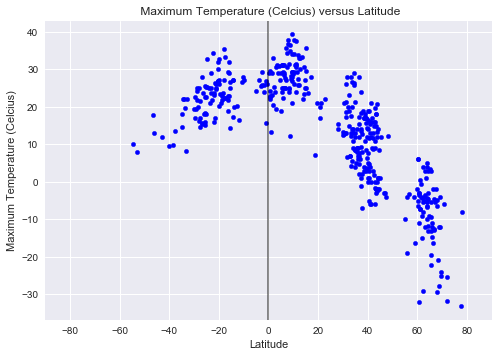

In [10]:
# Temperature vs Latitude 
random_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")
plt.title(" Maximum Temperature (Celcius) versus Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Maximum Temperature vs Latitude")
plt.show()

# Maximum Temperature versus Latitude - Observations
Temperatures do tend to be higher in cities that are closer to the equator.  You can see a downward trend in temperatures the farther away to go from the equator, especially in the northern hemisphere.  There are more cities in the sample population that are closer to the north pole compared to the south pole, which is likely because there are more cities in the northern hemisphere.


# Humidity versus Latitude

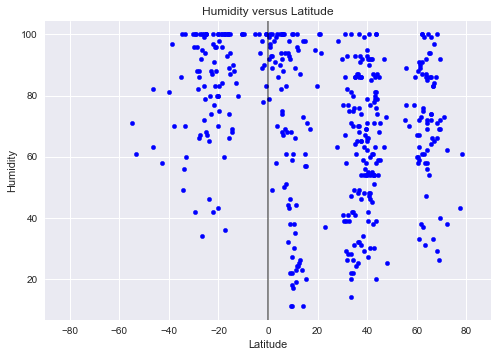

In [11]:

# Humidity vs Latitude 

random_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
plt.title("Humidity versus Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

# Humidity versus Latitude - Observations
In this sample population there does appear to be a slight trend that the farther away from the equator, the lowest humidity levels tend to increase.  As this trend is very slight there could be some population bias.


# Wind Speed versus Latitude

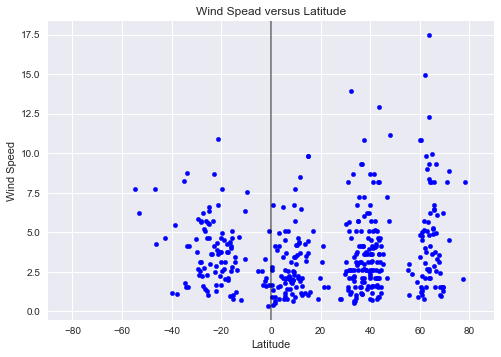

In [12]:
# Wind Speed vs Latitude
random_cities["Wind Speed"] = pd.to_numeric(random_cities["Wind Speed"])
random_cities.plot(kind="scatter",x="Latitude",y="Wind Speed",grid=True,color="blue")
plt.title("Wind Spead versus Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()

# Wind Speed versus Latitude - Observations
There does not appear to be a significant change in wind speed based on distace from the equator.  Generally, wind speeds are consistently below 10 KPH.  There are a few values over 10 KPH the farther away from the equator you go; however, there are very few and these could be outliers.


# Cloudiness versus Latitude

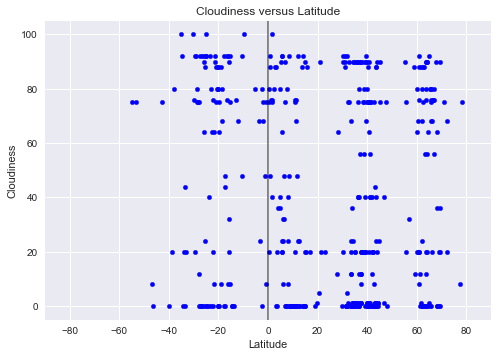

In [13]:
# Cloudiness vs Latitude
random_cities["Cloudiness"] = pd.to_numeric(random_cities["Cloudiness"])
random_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")
plt.title("Cloudiness versus Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()

# Cloudiness versus Latitude - Observations
No significant trends can be seen in the data for this sample population.  Distance from the equator does not appear to be a factor in cloudiness.

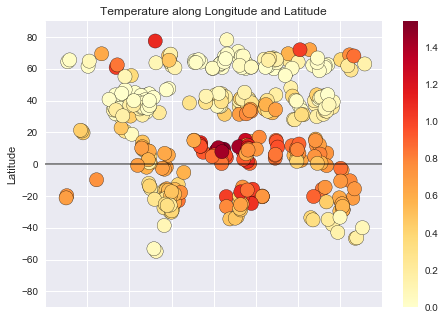

In [14]:
# Temperature approaching equator
size_temp = np.round((((random_cities.Temperature)/100)**2)*10,2)

random_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.ylim([-90,90])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Temperature approaching Equator")

plt.show()